<a href="https://colab.research.google.com/github/SamanMansoor/Data-Science/blob/main/credit_card_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# **Dataset Load**





In [ ]:
transactions = pd.read_csv('creditcard.csv')
transactions.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


# **Check The Type**

In [ ]:
transactions.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [ ]:
transactions.shape

(249556, 31)

In [ ]:
transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,249556.000000,249556.000000,249556.000000,249556.000000,249556.000000,249556.000000,249556.000000,249556.000000,249556.000000,249556.000000,...,249556.000000,249556.000000,249556.000000,249556.000000,249556.000000,249555.000000,249555.000000,249555.000000,249555.000000,249555.000000
mean,85202.024131,-0.037792,-0.020189,0.102598,0.024774,-0.037964,0.018971,-0.016577,0.002013,0.001185,...,-0.001825,-0.010741,-0.006411,0.000740,0.021556,0.001603,-0.000620,0.000834,90.736122,0.001823
std,42704.597318,1.960424,1.670365,1.507248,1.415129,1.376288,1.326704,1.227456,1.195251,1.112322,...,0.739045,0.716473,0.638282,0.606261,0.515101,0.485488,0.401563,0.333275,251.723468,0.042661
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,50249.000000,-0.936476,-0.608861,-0.714127,-0.837250,-0.728237,-0.747768,-0.565266,-0.201545,-0.655010,...,-0.225386,-0.533918,-0.165184,-0.350779,-0.291942,-0.329880,-0.070547,-0.050463,6.000000,0.000000
50%,77419.500000,-0.004920,0.060331,0.295455,0.014235,-0.095745,-0.250158,0.020682,0.029110,-0.058565,...,-0.031127,-0.000691,-0.018355,0.045039,0.052131,-0.059034,0.002358,0.013934,23.040000,0.000000
75%,127418.000000,1.264234,0.780993,1.102803,0.795004,0.565857,0.422239,0.546927,0.330641,0.608082,...,0.177360,0.498817,0.135778,0.432062,0.365098,0.248046,0.089074,0.077755,79.900000,0.000000
max,154462.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
duplicate_rows_df = transactions[transactions.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (919, 31)


In [ ]:
transactions.count()

Time      249556
V1        249556
V2        249556
V3        249556
V4        249556
V5        249556
V6        249556
V7        249556
V8        249556
V9        249556
V10       249556
V11       249556
V12       249556
V13       249556
V14       249556
V15       249556
V16       249556
V17       249556
V18       249556
V19       249556
V20       249556
V21       249556
V22       249556
V23       249556
V24       249556
V25       249556
V26       249555
V27       249555
V28       249555
Amount    249555
Class     249555
dtype: int64

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249556 entries, 0 to 249555
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    249556 non-null  float64
 1   V1      249556 non-null  float64
 2   V2      249556 non-null  float64
 3   V3      249556 non-null  float64
 4   V4      249556 non-null  float64
 5   V5      249556 non-null  float64
 6   V6      249556 non-null  float64
 7   V7      249556 non-null  float64
 8   V8      249556 non-null  float64
 9   V9      249556 non-null  float64
 10  V10     249556 non-null  float64
 11  V11     249556 non-null  float64
 12  V12     249556 non-null  float64
 13  V13     249556 non-null  float64
 14  V14     249556 non-null  float64
 15  V15     249556 non-null  float64
 16  V16     249556 non-null  float64
 17  V17     249556 non-null  float64
 18  V18     249556 non-null  float64
 19  V19     249556 non-null  float64
 20  V20     249556 non-null  float64
 21  V21     24

# **Dropping the missing or null values.**

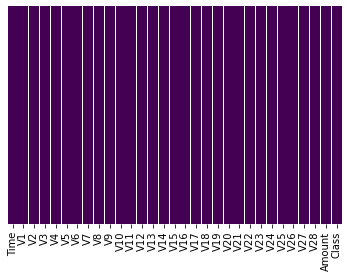

In [ ]:
# Heatmap to check missing values 
sns.heatmap(transactions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df = transactions.dropna()    # Dropping the missing values.
df.count()

Time      249555
V1        249555
V2        249555
V3        249555
V4        249555
V5        249555
V6        249555
V7        249555
V8        249555
V9        249555
V10       249555
V11       249555
V12       249555
V13       249555
V14       249555
V15       249555
V16       249555
V17       249555
V18       249555
V19       249555
V20       249555
V21       249555
V22       249555
V23       249555
V24       249555
V25       249555
V26       249555
V27       249555
V28       249555
Amount    249555
Class     249555
dtype: int64

In [ ]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


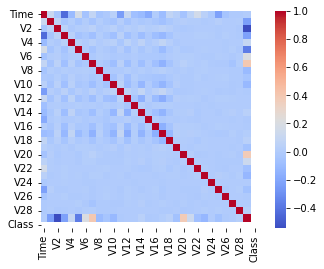

In [ ]:
sample = df[df['Class']==0]
normcorr=  sample.corr()
sns.heatmap(normcorr, cbar = True,  square = True, annot=False, fmt= '.2f',annot_kws={'size': 20},
           cmap= 'coolwarm')
plt.show()

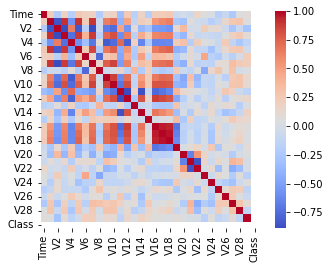

In [ ]:

fraud = df[df['Class']==1]

fraudcorr = fraud.corr()
sns.heatmap(fraudcorr, cbar = True,  square = True, annot=False, fmt= '.2f',annot_kws={'size': 20},
           cmap= 'coolwarm')
plt.show()

V9 - V10


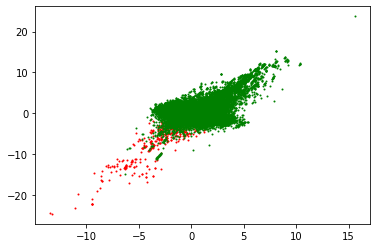

<Figure size 432x288 with 0 Axes>

In [ ]:
print('V9 - V10')
plt.scatter(fraud['V9'], fraud['V10'],s=1, color='r')
plt.scatter(sample['V9'], sample['V10'], s=1, color='g')
plt.show()
plt.clf()

V16-V17


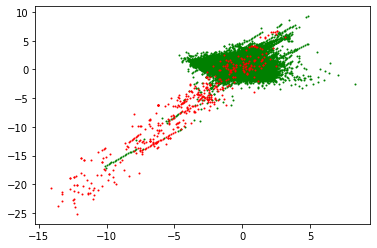

<Figure size 432x288 with 0 Axes>

In [ ]:
print('V16-V17')
plt.scatter(sample['V16'], sample['V17'], s=1, color = 'g')
plt.scatter(fraud['V16'], fraud['V17'], s=1, color = 'r')
plt.show()
plt.clf()

V17 - V18


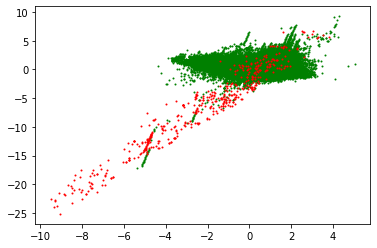

<Figure size 432x288 with 0 Axes>

In [ ]:
print('V17 - V18')
plt.scatter(sample['V18'], sample['V17'], s=1, color = 'g')
plt.scatter(fraud['V18'], fraud['V17'], s=1, color = 'r')
plt.show()
plt.clf()

V1 - V3


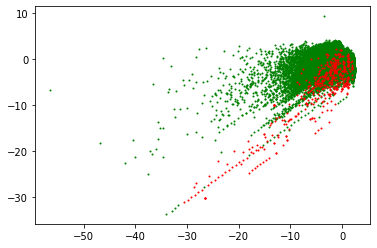

<Figure size 432x288 with 0 Axes>

In [ ]:
print('V1 - V3')
plt.scatter(sample['V1'], sample['V3'], s=1, color = 'g')
plt.scatter(fraud['V1'], fraud['V3'], s=1, color = 'r')
plt.show()
plt.clf()

V1 - V2


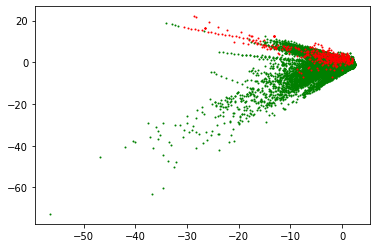

<Figure size 432x288 with 0 Axes>

In [ ]:
print('V1 - V2')
plt.scatter(sample['V1'], sample['V2'], s=1, color = 'g')
plt.scatter(fraud['V1'], fraud['V2'], s=1, color = 'r')
plt.show()
plt.clf()

In [ ]:
df = df[['Class', 'V9', 'V10', 'V16', 'V17', 'V18','Amount']]


sample = df[df['Class']==0]
sample.head()


,Class,V9,V10,V16,V17,V18,Amount
0,0.0,0.363787,0.090794,-0.470401,0.207971,0.025791,149.62
1,0.0,-0.255425,-0.166974,0.463917,-0.114805,-0.183361,2.69
2,0.0,-1.514654,0.207643,-2.890083,1.109969,-0.121359,378.66
3,0.0,-1.387024,-0.054952,-1.059647,-0.684093,1.965775,123.50
4,0.0,0.817739,0.753074,-0.451449,-0.237033,-0.038195,69.99


In [ ]:
fraud = df[df['Class'] == 1]
fraud

,Class,V9,V10,V16,V17,V18,Amount
541,1.0,-2.770089,-2.772272,-1.140747,-2.830056,-0.016822,0.00
623,1.0,-0.270953,-0.838587,0.666780,0.599717,1.725321,529.00
4920,1.0,-0.238253,-1.525412,-2.282194,-4.781831,-2.615665,239.93
6108,1.0,-0.247768,-4.801637,-7.358083,-12.598419,-5.131549,59.00
6329,1.0,-1.282858,-2.447469,2.581851,6.739384,3.042493,1.00
...,...,...,...,...,...,...,...
247995,1.0,-1.132044,-3.356474,-1.475640,-3.082274,0.224740,51.37
248296,1.0,-3.747646,-4.230984,0.269282,0.591319,1.795992,0.00
248971,1.0,-1.849927,-3.443819,-1.176629,-1.859739,-0.049419,0.76
249167,1.0,-0.734975,-4.441484,-1.555963,-2.084067,0.394247,1504.93


In [ ]:
ignore_me, sample = train_test_split(sample, test_size = 0.02)

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings("ignore")

sample = pd.concat([sample, fraud])

In [ ]:
train, test = train_test_split(sample, test_size = 0.3)

trainy = train['Class']
testy = test['Class']
train.drop('Class', 1, inplace = True)
test.drop('Class', 1, inplace = True)

In [ ]:
scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [ ]:
clf = SVC()
clf.fit(train, trainy)
outcome = list(clf.predict(test))
testy = list(testy)

In [ ]:
count = 0
falsepos = 0
truepos = 1
falseneg = 0
trueneg = 0


for i in range (1,len(testy)):
    if (outcome[i]==1):
        if (testy[i] == 1):
            truepos = truepos + 1
        else:
            falsepos = falsepos + 1
    else:
        if (testy[i] == 0):
            trueneg = trueneg + 1
        else:
            falseneg = falseneg  +1
    count = count + 1

In [ ]:
precision = truepos / (truepos + falsepos)
recall = truepos / (truepos + falseneg)
F1 = 2*((precision * recall ) / (precision + recall))

print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F1 = " + str(F1))

Precision = 0.9917355371900827
Recall = 0.821917808219178
F1 = 0.898876404494382


In [ ]:
fraud = df[df['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df.shape[0]) + ' frauds')

There are only 2678 frauds where the amount was bigger than 1000 over 249555 frauds


In [ ]:
number_fraud = len(df[df.Class == 1])
number_no_fraud = len(df[df.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 455 frauds in the original dataset, even though there are 249100 no frauds in the dataset.


In [ ]:
print("The accuracy of the classifier then would be : "+ str((5970-1)/5970))

The accuracy of the classifier then would be : 0.9998324958123953


In [ ]:
clf.score(train, trainy)

0.9852825229960578

# **RandomForestClassifier**

In [ ]:
train, test = train_test_split(sample, test_size = 0.3)

trainy = train['Class']
testy = test['Class']
train.drop('Class', 1, inplace = True)
test.drop('Class', 1, inplace = True)

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train,trainy)

y_pred=clf.predict(test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(testy, y_pred))


Accuracy: 0.9803921568627451


In [ ]:
clf.score(train, trainy)

1.0

In [ ]:
def cal_accuracy(testy, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(testy, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(testy,y_pred)*100)
      
    print("Report : ",
    classification_report(testy, y_pred))

## **DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
train, test = train_test_split(sample, test_size = 0.3)

trainy = train['Class']
testy = test['Class']
train.drop('Class', 1, inplace = True)
test.drop('Class', 1, inplace = True)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(train,trainy)

#Predict the response for test dataset
y_pred = clf.predict(test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(testy, y_pred))


Accuracy: 0.9761029411764706


In [ ]:
clf.score(train, trainy)

1.0